# Rework 2022 

In [18]:
!pip install yfinance

import numpy as np
import pandas as pd
import yfinance as yfin
import pandas_datareader as pdr


[*********************100%***********************]  1 of 1 completed


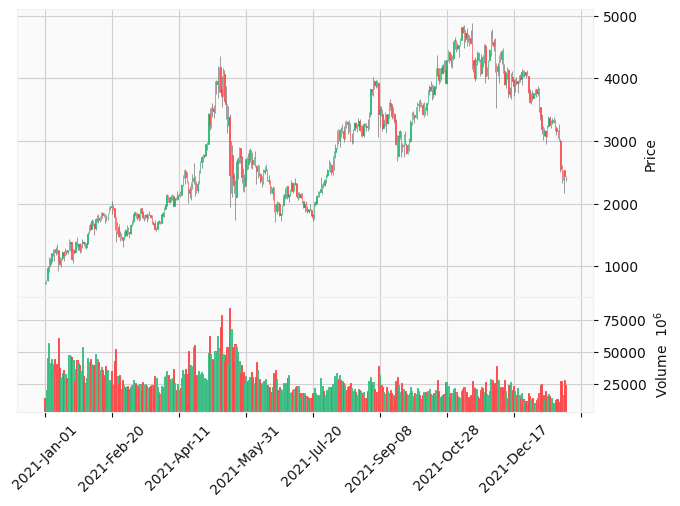

In [21]:
# update date range "start" as desired
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()

# insert cryptoasset (in Yahoo format "NNN-CCC" es BTC-EUR or ETH-USD) here
yfin.pdr_override()
data = yfin.download("ETH-USD", start, end)

mpf.plot(data, type="candle", volume=True, style="yahoo")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


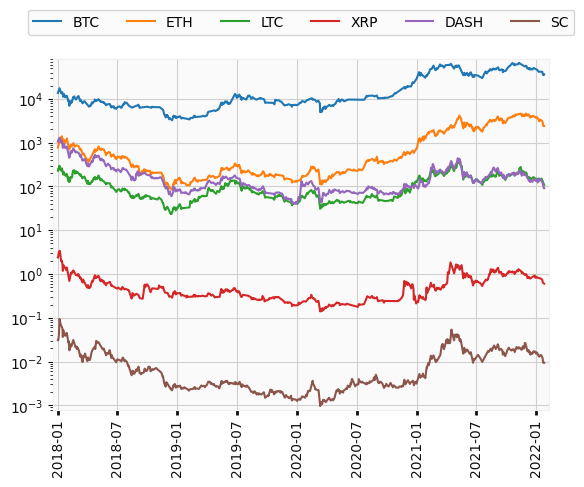

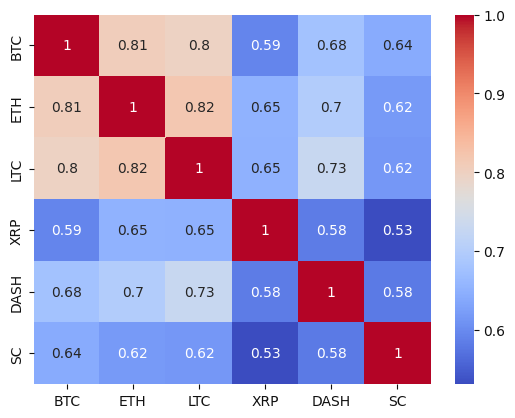

           BTC       ETH       LTC       XRP      DASH        SC
BTC   1.000000  0.806251  0.796813  0.593853  0.678177  0.642187
ETH   0.806251  1.000000  0.819769  0.653384  0.699011  0.619735
LTC   0.796813  0.819769  1.000000  0.651687  0.729086  0.616286
XRP   0.593853  0.653384  0.651687  1.000000  0.583784  0.530991
DASH  0.678177  0.699011  0.729086  0.583784  1.000000  0.581760
SC    0.642187  0.619735  0.616286  0.530991  0.581760  1.000000


In [22]:
# user settings (modify accordingly to Yahoo Finance parameters)
currency = "USD"
metric = "Close"

start = dt.datetime(2018,1,1)
end = dt.datetime.now()

yfin.pdr_override()

crypto = ['BTC', 'ETH', 'LTC', 'XRP', 'DASH', 'SC']
colnames = []

first = True

for ticker in crypto:
    data = yfin.download(f"{ticker}-{currency}", start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames

plt.yscale('log') # first show linear

for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)
    
    
plt.tick_params(axis="x", width = 2)
plt.xticks(rotation = "vertical", )
plt.margins(0.01)
plt.subplots_adjust(bottom = 0.15)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=6, fancybox=True, shadow=False)

plt.show()

# Correlation Heat Map

combined = combined.pct_change().corr(method='pearson')

sns.heatmap(combined, annot=True, cmap="coolwarm")
plt.show()

print(combined)